### Task # 11:
- This is Task # 11 overall, and Task 1 of Week 6
### Task # 01:

In [1]:
#importing common libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Problem 1.1:
Predicting Diabetes Onset Using Logistic Regression
Dataset:
- Diabetes Dataset

Preprocessing Steps:
- Handle missing values if any.
- Standardize features.
- Encode categorical variables if any.

Task:
- Implement logistic regression to predict diabetes onset and evaluate the model using
accuracy, precision, and recall.

In [4]:
#importing the dataset
file_path = 'diabetes.csv'
diabetes_df = pd.read_csv(file_path)

#also we will check if there is any null value
print(diabetes_df.isnull().sum())

#a look at the dataset
diabetes_df.head(5)


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [15]:
#so we dont have any null values so lets move forward
#lets standardize our dataset
# Standardizing features using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fitting and transforming the dataset
diabetes_scaled = scaler.fit_transform(diabetes_df.drop('Outcome', axis=1))

In [16]:
from sklearn.model_selection import train_test_split

# Training and Testing dataset
X_train, X_test, y_train, y_test = train_test_split(diabetes_scaled, diabetes_df['Outcome'], test_size=0.2, random_state=42)

In [17]:
from sklearn.linear_model import LogisticRegression

# LogisticRegression object
log_reg = LogisticRegression()

# Training the model
log_reg.fit(X_train, y_train)

# Making predictions on the testing set
y_pred = log_reg.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.3f}')

# Calculating precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.3f}')

# Calculating recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.3f}')

Accuracy: 0.753
Precision: 0.649
Recall: 0.673


#### Problem 1.2:
Classifying Iris Species Using Decision Trees
Dataset:
- Iris Dataset

Preprocessing Steps:
- Handle missing values if any.
- Standardize features.
- Encode categorical variables if any.

Task:
- Implement a decision tree classifier to classify iris species and evaluate the model
using confusion matrix and accuracy.

In [3]:
#importing the datasets
from sklearn import datasets
iris = datasets.load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

In [5]:
#checking the null values
print(iris_df.isnull().sum())

# a look at the dataset
iris_df.head(5)

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
# Standardizing the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standard_iris = scaler.fit_transform(iris_df.drop(('target'),axis = 1))

In [18]:
##if you want to know the difference between the dataset values before standardization and after standardization have a look at its standard deviatiom
# std_df = pd.DataFrame(standard_iris,columns=iris_df.drop(('target'),axis =1 ).columns)

# print(std_df.std())
# print(iris_df.drop(('target'),axis =1 ).std())

In [24]:
# lets turn the numpy array into the dataframe
standard_iris = pd.DataFrame(standard_iris,columns=iris_df.drop(('target'),axis =1 ).columns)

# X features is standard iris

#y is the target variable
y = iris_df['target']

#preparing training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(standard_iris,y,test_size=0.2,random_state=42)

In [25]:
# Trainig decision tree classifier
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=1)

#fitting the model to the training dataset
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [27]:
# Lets make predictions now
y_pred = clf.predict(X_test)

In [28]:
# Evaluating the model

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

#confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

#classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



#### Problem 1.3:
Predicting Titanic Survival Using Logistic Regression
Dataset:
- Titanic Dataset

Preprocessing Steps:
- Handle missing values (e.g., fill missing ages with median).
- Encode categorical variables (e.g., one-hot encoding for embarked and gender).
- Standardize numerical features.

Task:
- Implement logistic regression to predict survival on the Titanic and evaluate the
model using ROC-AUC.

In [78]:
#importing the dataset
file_path = 'titanic.csv'
titanic_df = pd.read_csv(file_path)

#checking the null values,if there are any lets print there percentage
print(titanic_df.isnull().sum()/titanic_df.shape[0]*100)

#a look at the dataset
titanic_df.head(5)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


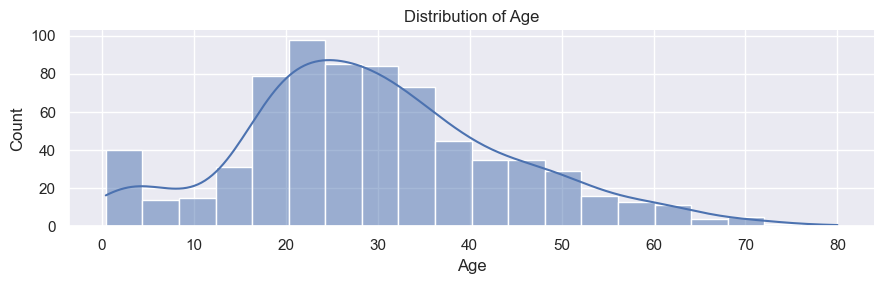

In [79]:
#from the above output we see that cabin has more than 50% null values so its better to drop this column,The other 2 columns are age and embarked, 

# Creating the copy of dataset to be on safe side 
titanic_df1 = titanic_df.copy()

#dropping Cabin
titanic_df1.drop('Cabin',axis = 1,inplace = True)

#Lets have a look at the distribution of the Age 
sns.displot(titanic_df1['Age'],kde = True,height = 3,aspect = 3)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [80]:
#from the above distribution we see that mean wont be a good choice for this , as the data is a bit skewed so we will use median
#and for the embarked as it is a categorical feature we will use mode for it 

# Fill missing ages with the median age
titanic_df1['Age'] = titanic_df1['Age'].fillna(titanic_df1['Age'].median())

# Fill missing embarked with the most frequent value (mode)
titanic_df1['Embarked'] = titanic_df1['Embarked'].fillna(titanic_df1['Embarked'].mode()[0])

#null values verification 
titanic_df1.columns[titanic_df1.isnull().any()]

Index([], dtype='object')

In [81]:
#now before encoding lets check if there exist some columns with categorical values
titanic_df1.select_dtypes(include=['object', 'category']).columns

Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')

In [82]:
#names cant be taken as category but lets have a look at the other variables
print(titanic_df1['Sex'].value_counts())
print(titanic_df1['Ticket'].value_counts())
print(titanic_df1['Embarked'].value_counts())

Sex
male      577
female    314
Name: count, dtype: int64
Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64
Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


In [83]:
#ignoring the names and ticket columns for encoding
# we will be using one hot encoder
from sklearn.preprocessing import OneHotEncoder

# Creating an encoder for the 'Embarked' and 'Sex' columns
encoder = OneHotEncoder(drop='first')

# Fitting  the encoder to the data and transform it
encoded_features = encoder.fit_transform(titanic_df1[['Embarked', 'Sex']])

# Converting the encoded features to a DataFrame
encoded_df = pd.DataFrame(encoded_features.toarray(), columns=encoder.get_feature_names_out(['Embarked', 'Sex']))

# Concatenating the encoded features with the original dataset
titanic_df1 = pd.concat([titanic_df1, encoded_df], axis=1)

# Drop the original 'Embarked' and 'Sex' columns
titanic_df1.drop(columns=['Embarked', 'Sex'], inplace=True)

In [84]:
#lets have a look at the numerical columns before standardization
print(titanic_df1['Age'].std())
print(titanic_df1['Fare'].std())

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

titanic_df1[['Age', 'Fare']] = scaler.fit_transform(titanic_df1[['Age', 'Fare']])

#a look again at the standard deviation
print(titanic_df1['Age'].std())
print(titanic_df1['Fare'].std())

13.019696550973194
49.693428597180905
1.000561640033049
1.0005616400330462


In [99]:

# Define features and target variable
X = titanic_df1.drop(columns=['Survived', 'Name', 'Ticket', 'PassengerId'])
y = titanic_df1['Survived']

In [100]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [101]:
from sklearn.linear_model import LogisticRegression

# Create and train logistic regression model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

Training ROC-AUC: 0.8501
Testing ROC-AUC: 0.8829


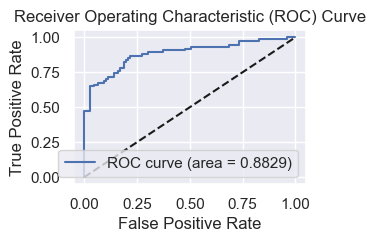

In [102]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Prediction
y_train_pred_prob = model.predict_proba(X_train)[:, 1]
y_test_pred_prob = model.predict_proba(X_test)[:, 1]

# CROC-AUC for the training and testing sets
roc_auc_train = roc_auc_score(y_train, y_train_pred_prob)
roc_auc_test = roc_auc_score(y_test, y_test_pred_prob)

print(f'Training ROC-AUC: {roc_auc_train:.4f}')
print(f'Testing ROC-AUC: {roc_auc_test:.4f}')

# Plotting ROC curve for the testing set
fpr, tpr, _ = roc_curve(y_test, y_test_pred_prob)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc_test:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### Problem 1.4:
Classifying Emails as Spam Using Decision Trees
Dataset:
- Spam Email Dataset

Preprocessing Steps:
- Handle missing values if any.
- Standardize features.
- Encode categorical variables if present.

Task:
- Implement a decision tree classifier to classify emails as spam or not and evaluate
the model using precision, recall, and F1-score.

In [106]:
#importing the dataset
file_path = 'mail_data.csv'
mail_df = pd.read_csv(file_path)

print(mail_df.columns[mail_df.isnull().any()])

mail_df.head(3)

Index([], dtype='object')


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [108]:
#label encoding for the target variable
mail_df.loc[mail_df['Category']=='spam','Category',] = 0
mail_df.loc[mail_df['Category']=='ham','Category',] = 1

mail_df.head(3)

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...


In [109]:
# separating the feature and target variable
X = mail_df['Message']
y = mail_df['Category']

In [110]:
#train test splitting
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [118]:
# a text data cannot be given to a Ml model , instead it should be converted in an understandable format
from sklearn.feature_extraction.text import TfidfVectorizer

feature_extraction = TfidfVectorizer(min_df = 1,stop_words='english',lowercase=True)
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

y_test = y_test.astype('int')
y_train = y_train.astype('int')

In [119]:
# model training
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_features, y_train)


DecisionTreeClassifier(random_state=42)

In [121]:
# Evaluating the model
from sklearn.metrics import precision_score, recall_score, f1_score

# Predict on the test set
y_pred = dt_model.predict(X_test_features)

#precision
precision = precision_score(y_test, y_pred)

#recall score
recall = recall_score(y_test, y_pred)

#f1_score
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')

Precision: 0.9785
Recall: 0.9886
F1-Score: 0.9835


#### Problem 1.5:
Predicting Customer Satisfaction Using Logistic Regression
Dataset:
- Customer Satisfaction Dataset

Preprocessing Steps:
- Handle missing values (e.g., fill missing values with median).
- Encode categorical variables (e.g., one-hot encoding for region).
- Standardize numerical features.
                                
Task:
- Implement logistic regression to predict customer satisfaction and evaluate the model
using accuracy and confusion matrix

In [6]:
#importing the dataset
fp = 'customer_survey_1.csv'
customer_df = pd.read_csv(fp)

#check for null
print(customer_df.columns[customer_df.isnull().any()])

#a look at the dataset
customer_df.head(5)

Index(['Arrival Delay in Minutes'], dtype='object')


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [8]:
#a look at the percentage
customer_df['Arrival Delay in Minutes'].isnull().sum()/customer_df.shape[0]*100

0.31952571604558055

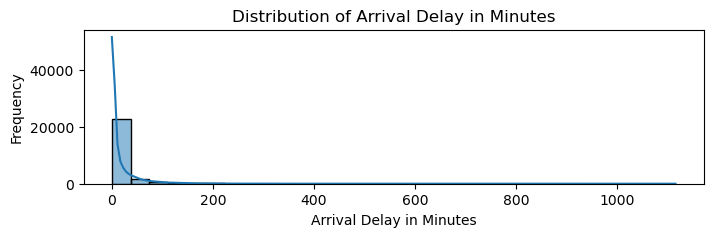

In [20]:

# Plotting the distribution of 'Arrival Delay in Minutes'
plt.figure(figsize=(8,2))
sns.histplot(customer_df['Arrival Delay in Minutes'].dropna(), kde=True, bins=30)
plt.title('Distribution of Arrival Delay in Minutes')
plt.xlabel('Arrival Delay in Minutes')
plt.ylabel('Frequency')
plt.show()


In [25]:
#it seems to be very skewed on the left side so we will use median

customer_df['Arrival Delay in Minutes'] = customer_df['Arrival Delay in Minutes'].fillna(customer_df['Arrival Delay in Minutes'].median())

#verification
print(customer_df.columns[customer_df.isnull().any()])

Index([], dtype='object')


In [34]:
#lets do label encoding for our target variable
customer_df.loc[customer_df['satisfaction']=='satisfied','satisfaction',] = 1
customer_df.loc[customer_df['satisfaction']=='neutral or dissatisfied','satisfaction',] = 0

#checking the labeled categories
customer_df['satisfaction'].value_counts()

satisfaction
0    14573
1    11403
Name: count, dtype: int64

In [35]:
# lets do some label encoding for other columns which are required
customer_df.loc[customer_df['Gender']=='Female','Gender',] = 1
customer_df.loc[customer_df['Gender']=='Male','Gender',] = 0

In [36]:
#lets have a look at the datatypes , to see if we need some adjustments to it or not
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [39]:
#the satisfaction should be in int type 
customer_df['satisfaction'] = customer_df['satisfaction'].astype(int)

In [41]:
#we should do label encoding for Customer Type,Type of travel and class 

from sklearn.preprocessing import LabelEncoder

le_customer_type = LabelEncoder()
le_type_of_travel = LabelEncoder()
le_class = LabelEncoder()

# Fit and transform the categorical columns
customer_df['Customer Type'] = le_customer_type.fit_transform(customer_df['Customer Type'])
customer_df['Type of Travel'] = le_type_of_travel.fit_transform(customer_df['Type of Travel'])
customer_df['Class'] = le_class.fit_transform(customer_df['Class'])

In [43]:
#Standardizing some variables 
from sklearn.preprocessing import StandardScaler

scaler1 = StandardScaler()
scaler2 = StandardScaler()
scaler3 = StandardScaler()
scaler4 = StandardScaler()

# Standardizing each numerical feature separately
customer_df['Age'] = scaler1.fit_transform(customer_df[['Age']])
customer_df['Departure Delay in Minutes'] = scaler2.fit_transform(customer_df[['Departure Delay in Minutes']])
customer_df['Flight Distance'] = scaler3.fit_transform(customer_df[['Flight Distance']])
customer_df['Arrival Delay in Minutes'] = scaler4.fit_transform(customer_df[['Arrival Delay in Minutes']])


In [44]:
#so now lets have a look at the final form of our dataset
customer_df.head(6)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,1,0,0.817887,0,1,-1.035171,5,4,...,5,5,5,5,2,5,5,0.953810,0.782208,1
1,1,90035,1,0,-0.239238,0,0,1.671443,1,1,...,4,4,4,4,3,4,5,-0.382286,-0.392188,1
2,2,12360,0,1,-1.296363,0,1,-1.003128,2,0,...,2,4,1,3,2,2,2,-0.382286,-0.392188,0
3,3,77959,0,0,0.289325,0,0,2.186131,0,0,...,1,1,1,1,3,1,4,-0.382286,-0.232043,1
4,4,36875,1,0,0.619676,0,1,-0.011804,2,3,...,2,2,2,2,4,2,4,-0.382286,0.141628,1
5,5,39177,0,0,-1.560644,0,1,-0.883969,3,3,...,5,4,3,1,1,2,5,-0.382286,-0.392188,1


In [46]:
# test train split
from sklearn.model_selection import train_test_split

#defining the feature and target variables as X and Y respectively

X = customer_df.drop(['id','Unnamed: 0','satisfaction'],axis=1)
Y = customer_df['satisfaction']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [47]:
# Logistic Regression model
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)

# Fiting the model on the training data
lr_model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [48]:
# Prediction on the test set
Y_pred = lr_model.predict(X_test)

In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# accuracy
accuracy = accuracy_score(Y_test, Y_pred)

# confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Generate classification report
class_report = classification_report(Y_test, Y_pred)

# Print evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.8659
Confusion Matrix:
[[2630  315]
 [ 382 1869]]


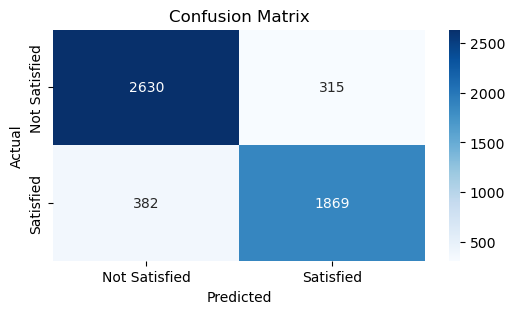

In [55]:
# heatmap for the confusion matrix
plt.figure(figsize=(6, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Satisfied', 'Satisfied'], 
            yticklabels=['Not Satisfied', 'Satisfied'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [56]:


# classification report
report = classification_report(Y_test, Y_pred, target_names=['Not Satisfied', 'Satisfied'], output_dict=True)

# Convert to DataFrame 
report_df = pd.DataFrame(report).transpose()

print(report_df)


               precision    recall  f1-score      support
Not Satisfied   0.873174  0.893039  0.882995  2945.000000
Satisfied       0.855769  0.830298  0.842841  2251.000000
accuracy        0.865858  0.865858  0.865858     0.865858
macro avg       0.864472  0.861668  0.862918  5196.000000
weighted avg    0.865634  0.865858  0.865599  5196.000000
